# So Now from the previous three ML classification models we know that we have obtained a high accuracy in predicting whether there are chances of no Landslide, Small Landslides or Large Disastrous Landslides.

# Now using the regression models we will try to predict the probability of occuring of a Landslide 

# Now let us try to understand how linear regression works

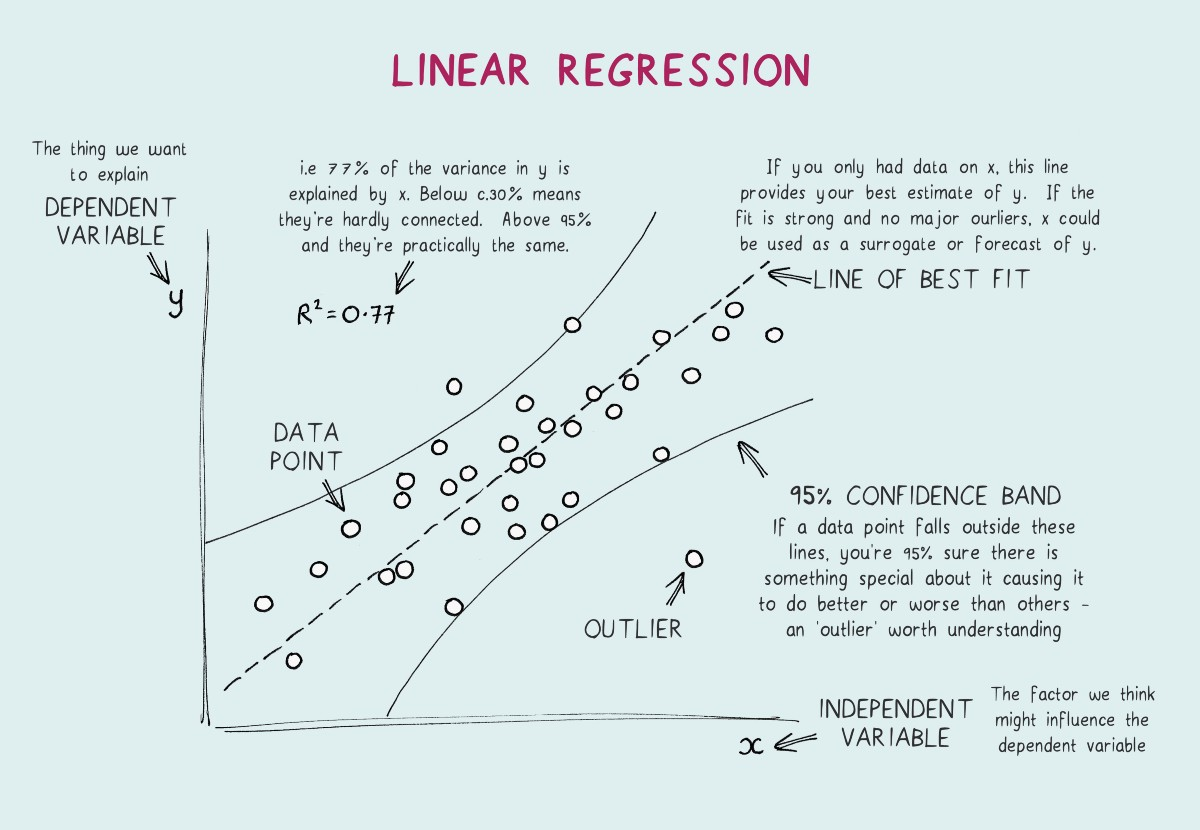

# So linear Regression actually finds the best fit line .Since we have a little more complex variable we will also be including higher powers to get the best results.

In [1]:
# Importing various libraries
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Import Data
df = pd.read_csv('Landslide_dataforlinearregression.csv')

In [3]:
df.head()

,Activity,Trigger,Landslide Volume,Landslide predictability,Cummulative Rainfall,Rainfall Intensity,Product
0,Active,Heavy rain,6750,60,70,0.8,56.0
1,Dormant,Heavy rain,1500,30,50,0.5,25.0
2,Dormant,Heavy rain,400,15,30,0.6,18.0
3,Reactivated,Heavy rain,450,18,40,0.5,20.0
4,Dormant,continous rainfall,200,10,25,0.4,10.0


In [4]:
import warnings
warnings.filterwarnings('ignore')

# Now let's see how each variable is corelated to Landslide predictability

In [5]:
df.corr()

,Landslide Volume,Landslide predictability,Cummulative Rainfall,Rainfall Intensity,Product
Landslide Volume,1.000000,0.426045,0.679600,0.180497,0.697622
Landslide predictability,0.426045,1.000000,0.877177,0.528274,0.908826
Cummulative Rainfall,0.679600,0.877177,1.000000,0.302122,0.953964
Rainfall Intensity,0.180497,0.528274,0.302122,1.000000,0.521604
Product,0.697622,0.908826,0.953964,0.521604,1.000000


# Now activity and trigger are categorical variables.regressionmodel need only float values so they need to be converted into dummy variables.

In [6]:
X=df[['Activity','Trigger']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,Activity_Dormant,Activity_Reactivated,Trigger_Heavy rain,Trigger_Steep slope,Trigger_continous rainfall,Trigger_flooding,Trigger_road cutting
0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0
2,1,0,1,0,0,0,0
3,0,1,1,0,0,0,0
4,1,0,0,0,1,0,0


In [7]:
df.head()

,Activity,Trigger,Landslide Volume,Landslide predictability,Cummulative Rainfall,Rainfall Intensity,Product
0,Active,Heavy rain,6750,60,70,0.8,56.0
1,Dormant,Heavy rain,1500,30,50,0.5,25.0
2,Dormant,Heavy rain,400,15,30,0.6,18.0
3,Reactivated,Heavy rain,450,18,40,0.5,20.0
4,Dormant,continous rainfall,200,10,25,0.4,10.0


In [8]:
df=pd.concat([df,X],axis=1)
df.head()


,Activity,Trigger,Landslide Volume,Landslide predictability,Cummulative Rainfall,Rainfall Intensity,Product,Activity_Dormant,Activity_Reactivated,Trigger_Heavy rain,Trigger_Steep slope,Trigger_continous rainfall,Trigger_flooding,Trigger_road cutting
0,Active,Heavy rain,6750,60,70,0.8,56.0,0,0,1,0,0,0,0
1,Dormant,Heavy rain,1500,30,50,0.5,25.0,1,0,1,0,0,0,0
2,Dormant,Heavy rain,400,15,30,0.6,18.0,1,0,1,0,0,0,0
3,Reactivated,Heavy rain,450,18,40,0.5,20.0,0,1,1,0,0,0,0
4,Dormant,continous rainfall,200,10,25,0.4,10.0,1,0,0,0,1,0,0


# Now specyfing the learning amd Target variables

In [9]:
X=df[['Landslide Volume','Cummulative Rainfall','Rainfall Intensity','Product','Activity_Dormant','Activity_Reactivated','Trigger_Heavy rain','Trigger_Steep slope','Trigger_continous rainfall','Trigger_road cutting','Trigger_flooding']]

In [10]:
Y=df[['Landslide predictability']]

In [11]:
from sklearn.model_selection import train_test_split

# Spilling training and test data set in ratio of 75 and 25

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting test and train data in model

In [14]:
model.fit(x_train, y_train)

LinearRegression()

# Now since we dont have the direct accuracy function in Linear regression we will check its performance by following parameters

## 1.Coefficient of determination- The coefficient of determination or R squared method is the proportion of the variance in the dependent variable that is predicted from the independent variable.
## If R2 is equal to 0, then the dependent variable cannot be predicted from the independent variable.
## If R2 is equal to 1, then the dependent variable can be predicted from the independent variable without any error.

In [15]:
r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9211894359859512


### The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

In [18]:
# Mean error
print("Mean  error: %.2f" % np.mean((model.predict(x_test) - y_test) ))
# The mean squared error
print("Mean  square error: %.2f" % np.mean((model.predict(x_test) - y_test)**2 ))

Mean  error: -2.40
Mean  square error: 69.48


In [19]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(x_test, y_test))

Variance score: 0.91


In [20]:
#To retrieve the intercept:
print(model.intercept_)

#For retrieving the slope:
print(model.coef_)

[9.8856518]
[[-1.81302150e-04 -3.76585592e-02 -3.75811953e+00  1.02705817e+00
  -5.49794421e+00  8.17413997e-01 -3.07690405e+00 -4.44934067e+00
   2.13781820e+00 -2.40930294e+00 -6.15629227e+00]]


# Now we will be predicting from our model.this function is deployed to a website as well which we will see later

In [21]:
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 57.457621  ]
 [ 22.95331685]
 [ 16.34070125]
 [ 24.70033705]
 [ 14.31513527]
 [ 45.55793227]
 [ 35.95468486]
 [ 20.63642823]
 [ 48.55360987]
 [ 96.58055913]
 [ 34.69575506]
 [ 34.75014571]
 [ 81.56804662]
 [ 10.53747906]
 [ 51.60730238]
 [ 45.62061079]
 [ 22.50398235]
 [117.68486565]
 [ 65.94380759]
 [125.73140162]
 [ 24.25338995]
 [ 17.38527096]
 [ 17.75838175]
 [ 65.74134537]
 [ 90.20305327]
 [ 73.20549697]
 [ 18.46947899]
 [ 21.46125778]
 [ 62.67156961]
 [ 76.07058512]
 [ 14.18310139]
 [ 13.42968932]
 [ 40.92337428]
 [ 13.23975084]
 [ 32.96490256]
 [ 17.66581359]
 [ 74.40275946]
 [ 68.04261683]
 [ 13.03246022]
 [ 12.36485911]
 [  4.90934926]
 [  9.02808193]
 [ 89.91000311]
 [ 50.27127025]
 [ 43.95591204]
 [ 57.6056274 ]
 [ 75.14889468]
 [ 40.95193927]
 [ 75.96630868]
 [ 33.93297032]
 [ 64.5558481 ]
 [ 38.58055314]
 [ 51.04494613]
 [ 17.77469894]
 [ 75.58835863]
 [ 46.49782499]
 [ 12.17785413]
 [ 37.64817545]
 [ 63.90283667]
 [ 64.72025066]
 [ 17.83868045]
 [ 5

In [22]:
predictions = model.predict(x_test)

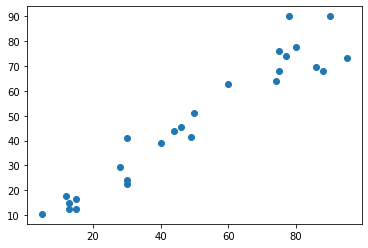

In [23]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.scatter(y_test, predictions)

## Now from the above plot it is cleary visible that predicted values are falling on linear on a polynomial line so our model will be making predictions very accurate.

(array([2., 2., 2., 9., 3., 4., 1., 0., 1., 2.]),
 array([-11.98907842,  -8.61072027,  -5.23236213,  -1.85400398,
          1.52435416,   4.90271231,   8.28107045,  11.6594286 ,
         15.03778674,  18.41614489,  21.79450303]),
 <BarContainer object of 10 artists>)

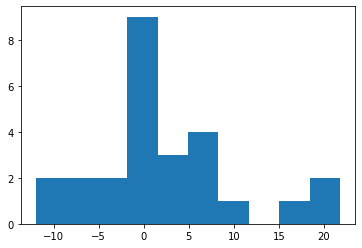

In [26]:
plt.hist(y_test - predictions)

## Now from the above graph we see that we have the most predicted variables with zero error and graph is also uniform so our model is doing pretty well.

In [25]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)

5.7557123282203655

# So when we calculate the mean absolute error it comes to be 5.75 and since predicatibilty lies from 0 to 100 percent we can say that our model will predict landslide value with a +/- of 5.75 .

In [29]:
#These all tasks are to get our model as pickle file to be deployed in website


In [30]:
import joblib


In [31]:
joblib.dump(model,"Landslide_predict.pkl")

['Landslide_predict.pkl']